$$\begin{align}
ba^{s_1}+c = i_1\\
ba^{s_2}+c = i_2\\
ba^{s_3}+c = i_3\\
\end{align}
$$


$$ c = i_1 - ba^{s_1}$$
$$b = \frac{i_2-c}{a^{s_2}} = \frac{i_2-i_1}{a^{s_2}-a^{s_1}}$$
$$a^{s_3} = \frac{i_3-c}{b} \implies (i_2-i_1)a^{s_3} + (i_1-i_3)a^{s_2} + (i_3-i_2)a^{s_1} = 0$$

In [1]:
import numpy as np
import scipy.optimize


"""
s1,s2,s3 and i1,i2,i3 have to be in _increasing_ order

            s1 < s2 < s3, i1 < i2 < i3
If solving fails, check if the provided points are convex.
            
Method can be 
'root_scalar': versatile, works for any scores
'polynomial': robust, but s3-s1 and s2-s1 have to be integers
"""
def getParam(s1,s2,s3,i1,i2,i3, method = 'root_scalar', a_range = [1.01,100]):
    d2 = s3-s1
    d1 = s2-s1
    if method == 'polynomial':
        coeff = []
        for c in range(d2, -1, -1):
            if c == d2:
                coeff.append(i2-i1)
            elif c == d1:
                coeff.append(i1-i3)
            elif c == 0:
                coeff.append(i3-i2)
            else:
                coeff.append(0)
        a = np.roots(coeff)
        b = (i2-i1)/(np.power(a,s2)-np.power(a,s1))
        c = i1-b*np.power(a,s1)
    elif method == 'root_scalar':
        f = lambda x: (i2-i1)*np.power(x,d2) + (i1-i3)*np.power(x,d1) + (i3-i2)
        print(f"{i2-i1}x^{d2}+{i1-i3}x^{d1}+{i3-i2}")
        a = scipy.optimize.root_scalar(f, bracket=a_range).root
        b = (i2-i1)/(np.power(a,s2)-np.power(a,s1))
        c = i1-b*np.power(a,s1)
    else:
        raise ValueError("Unknown root finding method.")
    return a,b,c

In [ ]:
#sample data:e
score = np.array([[16.5, 17.1, 17.7],
                  [15.5, 16.1, 16.7],
                  [23,   24,   25]])
iscore = np.array([[56, 100, 180],
                   [56, 100, 180],
                   [56, 100, 180]])

def calcParam(score, iscore):
    a = np.empty(3)
    b = np.empty(3)
    c = np.empty(3)
    for i in range(len(score)):
        x,y,z = getParam(score[i][0], score[i][1], score[i][2], iscore[i][0], iscore[i][1], iscore[i][2])
        a[i] = x
        b[i] = y
        c[i] = z
    return a,b,c
        
a,b,c = calcParam(score, iscore)

print(a)
print(b)
print(c)

# ans = np.where(np.logical_and(np.isreal(a), a > 1))


44x^1.1999999999999993+-124x^0.6000000000000014+80
44x^1.1999999999999993+-124x^0.6000000000000014+80
44x^2.0+-124x^1.0+80
[2.70850007 2.70850007 1.81818182]
[3.89562203e-06 1.05512925e-05 5.74043377e-05]
[2.22222222 2.22222222 2.22222222]


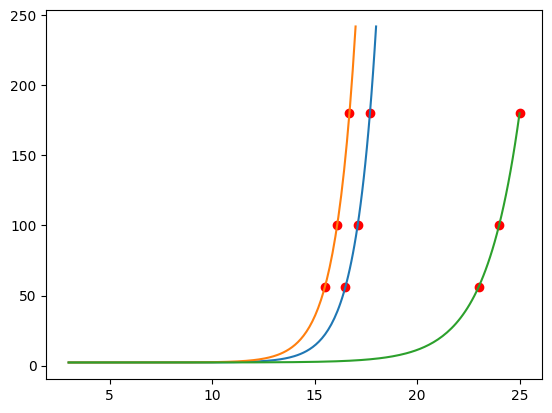

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = [np.linspace(3, 18, 200), np.linspace(3, 17, 200), np.linspace(3, 25, 200)]
for i in range(len(score)):
    y = b[i]*np.power(a[i],x[i])+c[i]
    ax.plot(x[i],y)
    ax.scatter(score.T[i], iscore.T[i], c='r')